<a href="https://colab.research.google.com/github/ftltnbs/Capstone_Project_-AutoScout-/blob/master/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(tf.__version__)

2.8.2


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
cifar10 = tf.keras.datasets.cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 7s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [8]:
y_train, y_test = y_train.flatten(), y_test.flatten()


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

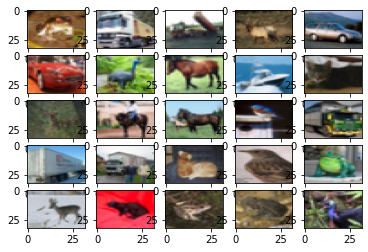

In [9]:
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [10]:
K = len(set(y_train))


In [11]:
print("number of classes:", K)


number of classes: 10


In [13]:
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

In [14]:
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

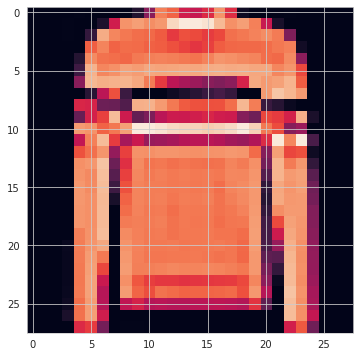

In [22]:
plt.imshow(X_train[5])

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [27]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [16]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)


In [17]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 21s 8ms/step - loss: 1.2937 - accuracy: 0.5555 - val_loss: 1.1894 - val_accuracy: 0.6082
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8406 - accuracy: 0.7070 - val_loss: 0.8849 - val_accuracy: 0.6967
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6896 - accuracy: 0.7601 - val_loss: 0.7608 - val_accuracy: 0.7387
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5830 - accuracy: 0.7993 - val_loss: 0.6489 - val_accuracy: 0.7876
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4979 - accuracy: 0.8277 - val_loss: 0.6269 - val_accuracy: 0.7937
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4200 - accuracy: 0.8552 - val_loss: 0.6343 - val_accuracy: 0.7979
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3509 - accuracy: 0.8786 - val_loss: 0.5934 - val_ac

**TASK 7: Plot values of metrics you used in your model.**

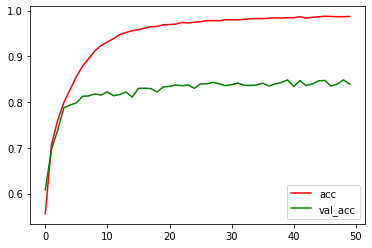

In [25]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

Original label is cat and predicted label is cat


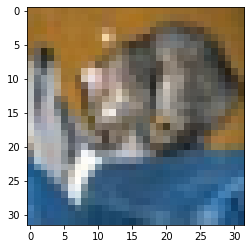

In [27]:
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
image_number = 0

plt.imshow(x_test[image_number])
 
n = np.array(x_test[image_number])
 
p = n.reshape(1, 32, 32, 3)
 
predicted_label = labels[model.predict(p).argmax()]
 
original_label = labels[y_test[image_number]]
 

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8982 - accuracy: 0.8391


[0.8981646299362183, 0.8391000032424927]

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8981646299362183
Test accuracy: 0.8391000032424927


In [41]:
pred_prob = model.predict(x_test)

In [42]:
y_pred = np.argmax(pred_prob, axis=1)

In [43]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       0.95      0.92      0.93      1000
           2       0.86      0.68      0.76      1000
           3       0.69      0.70      0.70      1000
           4       0.83      0.83      0.83      1000
           5       0.76      0.79      0.77      1000
           6       0.77      0.93      0.85      1000
           7       0.91      0.86      0.88      1000
           8       0.90      0.93      0.92      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [48]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [49]:
print(confusion_matrix(y_test, y_pred)) 


[[819   6  30  21  11   6  16   6  41  44]
 [  1 919   0   3   1   2   6   0  14  54]
 [ 39   5 684  41  69  48  80  16  11   7]
 [ 13   4  22 698  35 118  69  23  10   8]
 [  3   2  19  49 827  21  52  19   8   0]
 [  5   1  20 115  21 786  30  15   4   3]
 [  4   1   9  28   7  10 933   2   4   2]
 [  5   0  10  34  28  41   9 861   3   9]
 [ 20   2   3   7   0   3   7   1 933  24]
 [  5  31   2   9   0   3   4   6   9 931]]


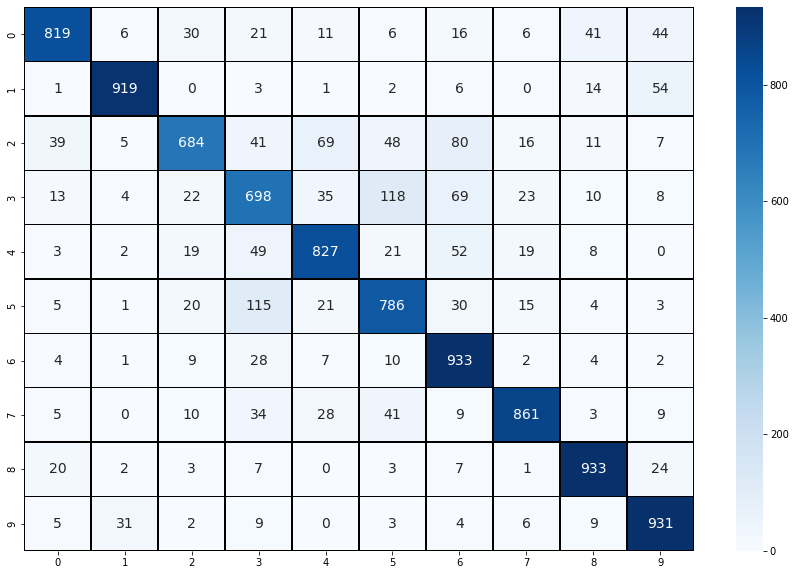

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [63]:
my_image = x_test[30]

In [55]:
my_image.shape

(32, 32, 3)

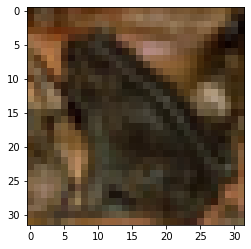

In [64]:
plt.imshow(my_image)

In [65]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [66]:
image_prediction

array([[1.3322294e-15, 2.7507124e-15, 7.5787099e-11, 3.2827160e-15,
        2.9901755e-17, 4.7516235e-16, 1.0000000e+00, 1.1101318e-19,
        1.6916668e-16, 1.3236229e-15]], dtype=float32)

In [67]:
np.argmax(image_prediction, axis=1)

array([6])

In [68]:
result=np.argmax(image_prediction, axis=1)

In [69]:
result

array([6])

In [70]:
classes[int(result)]

'frog'

In [71]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___